# Project: Wrangling and Analyzing Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#loading twitter_archive_enhanced.csv dataset
import pandas as pd
tweetsdf=pd.read_csv('twitter-archive-enhanced.csv')
tweetsdf.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#Getting image_predictions.tsv dataset from udacity server
import requests
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
try:
    urlresponse = requests.get(url)
    with open('image_predictions.tsv', 'wb') as file:
        file.write(urlresponse.content)
except urlresponse.exceptions.ConnectionError as err:
     urlresponse="No Response"
    
imagepredictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [3]:

imagepredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
import json
import numpy as np
import time
import warnings
import re
import warnings
import os
APIKey = "dRiwws6veVhWex5osMJowNKCf"
APISecretKey = "nysLyw0PqS7aWvk11WBA4D9RYvgYcDJKwafkEyOe0vPbi5S9wv"
AccessToken= "996342693860139009-lzMczU3lum04ke2HFsgVhNqCn1DVHkx"
AccessTokenSecret = "meMBBi8rGT10eA0vrwrIsNpY8rTgz5sCDs3h7b03oQOt7"

auth = tweepy.OAuthHandler(APIKey, APISecretKey)
auth.set_access_token(AccessToken, AccessTokenSecret)
api = tweepy.API(auth)

In [5]:
listdf = []
errorlist = []

starttime = time.time()

for tweet_id in tweetsdf['tweet_id']:
    try:
        tweets = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favoritestweetscount = tweets['favorite_count']
        retweetstweetscount = tweets['retweet_count'] 
        userfollowerscount = tweets['user']['followers_count'] 
        userfavouritescount = tweets['user']['favourites_count']
        tweetsdate_time = tweets['created_at'] 
        
        listdf.append({'tweet_id': int(tweet_id), 'favorites': int(favoritestweetscount), 'retweets': int(retweetstweetscount),
                        'user_followers': int(userfollowerscount), 'user_favourites': int(userfavouritescount),
                        'date_time': pd.to_datetime(tweetsdate_time)})
        
    except Exception as exception:
        print(str(tweet_id)+ " - " + str(exception))
        errorlist.append(tweet_id)
        

endtime = time.time()
print(endtime - starttime)

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


892420643555336193 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

888202515573088257 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

873697596434513921 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


872668790621863937 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


872261713294495745 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

869988702071779329 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

866816280283807744 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

863553081350529029 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


863471782782697472 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


863432100342583297 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


861769973181624320 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


860524505164394496 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


860276583193509888 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


858843525470990336 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


858471635011153920 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


856602993587888130 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


856330835276025856 - 404 Not Found
34 - Sorry, that page does not exist.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


855857698524602368 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


854365224396361728 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


854120357044912130 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


854010172552949760 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


852311364735569921 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


852226086759018497 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


851953902622658560 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


851861385021730816 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

847116187444137987 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


846874817362120707 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


845459076796616705 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


845397057150107648 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


845306882940190720 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


844704788403113984 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


842892208864923648 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


842163532590374912 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


842115215311396866 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

837366284874571778 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


837012587749474308 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

832757312314028032 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


832682457690300417 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

831650051525054464 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


831552930092285952 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

829374341691346946 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


829011960981237760 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


828801551087042563 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

827228250799742977 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


826115272272650244 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


825876512159186944 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

822489057087389700 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


822462944365645825 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


822244816520155136 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

820690176645140481 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


820494788566847489 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


820446719150292993 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

812747805718642688 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

805958939288408065 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


805932879469572096 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


805826884734976000 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


805823200554876929 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

802247111496568832 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


802239329049477120 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


802185808107208704 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

799774291445383169 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


799757965289017345 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

779123168116150273 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


778774459159379968 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


778764940568104960 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


778748913645780993 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

775096608509886464 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

772877495989305348 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


772826264096874500 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


772615324260794368 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

771004394259247104 - 403 Forbidden
179 - Sorry, you are not authorized to see this status.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


770743923962707968 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


770069151037685760 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


769940425801170949 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

767884188863397888 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


766864461642756096 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

765222098633691136 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


764857477905154048 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


764259802650378240 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


763956972077010945 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


763837565564780549 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

761292947749015552 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


761227390836215808 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

759923798737051648 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


759566828574212096 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

757611664640446465 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


757597904299253760 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


757596066325864448 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


757400162377592832 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

754011816964026368 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

744234799360020481 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


744223424764059648 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


743980027717509120 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

706904523814649856 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


706901761596989440 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

705102439679201280 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

703774238772166656 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


703079050210877440 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


703041949650034688 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


702932127499816960 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


702684942141153280 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


702276748847800320 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

699446877801091073 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


699434518667751424 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


699423671849451520 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

693095443459342336 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


692919143163629568 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


692905862751522816 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

688894073864884227 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688828561667567616 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

687494652870668288 - Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

680055455951884288 - 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

676776431406465024 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


676617503762681856 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


676613908052996102 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

675707330206547968 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


675706639471788032 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


675362609739206656 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


675354435921575936 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


675349384339542016 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

674291837063053312 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


674271431610523648 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

671390180817915904 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


671362598324076544 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


671357843010908160 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

669993076832759809 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


669972011175813120 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

668988183816871936 - Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

668542336805281792 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668274247790391296 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668256321989451776 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668248472370458624 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668237644992782336 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668221241640230912 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668190681446379520 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668171859951755264 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668154635664932864 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668142349051129856 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


668113020489474048 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


667937095915278337 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


667915453470232577 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


667911425562669056 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


667902449697558528 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

667502640335572993 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


667495797102141441 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


667453023279554560 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

667012601033924608 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


666996132027977728 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

666447344410484738 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


666437273139982337 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


666418789513326592 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


666411507551481857 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

3583.225963115692


In [6]:
print("Number of Rows Generated : ", len(listdf))
print("Number of Errors ", len(errorlist))

Number of Rows Generated :  2204
Number of Errors  152


In [7]:
# Creating JsonTweets Dataframe and saving into tweet_json.txt
jsontweets = pd.DataFrame(listdf, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers',
                                               'user_favourites', 'date_time'])
jsontweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [8]:
#loading tweet_json.txt file
twitterdata=pd.read_csv('tweet_json.txt', encoding = 'utf-8')
twitterdata.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892177421306343426,29359,5303,9269563,146756,2017-08-01 00:17:27+00:00
1,891815181378084864,22072,3486,9270022,146760,2017-07-31 00:18:03+00:00
2,891689557279858688,36936,7224,9269942,146756,2017-07-30 15:58:51+00:00
3,891327558926688256,35307,7773,9270022,146760,2017-07-29 16:00:24+00:00
4,891087950875897856,17809,2600,9269943,146756,2017-07-29 00:08:17+00:00


In the above section,I have gathered data from existing twitter-archive-enhanced.csv,downloaded image_predictions.tsv from udacity server and queried twitter api using tweepy. 

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**.



In [9]:
#getting random data samples from tweetsdf
tweetsdf.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,None,None,None,None
804,772117678702071809,NaN,NaN,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's a Clemson pup. Appears to be r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772117678...,12,10,Jack,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
1264,709918798883774466,NaN,NaN,2016-03-16 01:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Watson. He's a Suzuki Tickleboop. Leader ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709918798...,12,10,Watson,None,None,None,None
1889,674774481756377088,NaN,NaN,2015-12-10 02:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Superpup. His head isn't proportional ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674774481...,11,10,Superpup,None,None,pupper,None


>Quality:
>
1.The source column values are not easily readable

>Tidiness:
>
1.The dataset has for columns representing stages of a dog ie doggo, floofer, pupper, puppo

In [10]:
#getting random samples from imagepredictions
imagepredictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1153,732726085725589504,https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg,1,Pomeranian,0.961902,True,Samoyed,0.024289,True,chow,0.005772,True
359,672622327801233409,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1,golden_retriever,0.952773,True,Labrador_retriever,0.010835,True,clumber,0.008786,True
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True
1588,798340744599797760,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,papillon,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True
1421,772102971039580160,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,dhole,0.350416,False,hare,0.236661,False,wood_rabbit,0.091133,False
418,674036086168010753,https://pbs.twimg.com/media/CVqoPslWEAEk7EC.jpg,1,toy_poodle,0.685617,True,miniature_poodle,0.151936,True,Maltese_dog,0.045531,True


In [11]:
#getting random samples from twitter data
twitterdata.sample(10)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1696,676897532954456065,2055,650,9269548,146756,2015-12-15 22:52:02+00:00
2129,667455448082227200,171,53,9269549,146756,2015-11-19 21:32:34+00:00
2074,668643542311546881,789,447,9269548,146756,2015-11-23 04:13:37+00:00
1839,673359818736984064,1289,594,9269547,146756,2015-12-06 04:34:25+00:00
1040,728751179681943552,2555,619,9269539,146756,2016-05-07 00:59:55+00:00
1321,697881462549430272,2795,1060,9269543,146756,2016-02-11 20:34:41+00:00
384,820314633777061888,3157,523,9269946,146756,2017-01-14 17:00:24+00:00
990,738537504001953792,4712,1402,9269537,146756,2016-06-03 01:07:16+00:00
209,847617282490613760,6480,376,9269944,146756,2017-03-31 01:11:22+00:00
57,880872448815771648,18709,3204,9269945,146756,2017-06-30 19:35:32+00:00


In [12]:
#checking tweetsdf datatypes
tweetsdf.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Quality:
>
1.Change tweet_id to string data type instead of int
>
2.Change in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id to string instead of float or drop the columns because they are not relevant
>
3.Change retweeted_status_timestamp, timestamp to datetime instead of object.


In [13]:
#checking imagepredictictions datatypes
imagepredictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [14]:
#checking twitterdata datatypes
twitterdata.dtypes

tweet_id            int64
favorites           int64
retweets            int64
user_followers      int64
user_favourites     int64
date_time          object
dtype: object

In [15]:
#checking for nulls in tweetsdf
tweetsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
#checking for nulls in imagepredictions
imagepredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Quality:
>
1.Missing row values from imagepredictions dataset.The rows are 2075 instead of 2356.


In [17]:
#checking for nulls in twitterdata
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2204 non-null   int64 
 1   favorites        2204 non-null   int64 
 2   retweets         2204 non-null   int64 
 3   user_followers   2204 non-null   int64 
 4   user_favourites  2204 non-null   int64 
 5   date_time        2204 non-null   object
dtypes: int64(5), object(1)
memory usage: 103.4+ KB


In [18]:
#checking whether there are rating numerator values greater than 30.Such would not make sense
tweetsdf[tweetsdf['rating_numerator']>30]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


Quality:
>
1.The numerator and denominor values in the above set seem far fetched

### Quality issues
1.Source Column in tweetsdf is not easy to read.

2.Some columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id have float as their data types.They should have string as their data type since no operation will be done on them.

3.Missing rows in the image prediction dataset.The dataset has 2075 rows instead of 2356.

4.Some rating_numerator and rating_denominator values are invalid.

5.Timestamps columns should be of datetime data type not object.

6.Tweet_id column should have its data type as integer or preferrably of type string since no operation will be done on the column.

7.A Number of columns have null objects that are non-null.

8.Some tweets have two different tweet ids, that are retweets.

### Tidiness issues
1.The three datasets ie imagepredictions,tweetsdf and twitterdata should be in one dataset

2.There should be one column that will have values of the dog stages.

## Cleaning Data


In [19]:
# Make copies of original pieces of data
tweetsdfclean=tweetsdf.copy()
imagepredictionsclean=imagepredictions.copy()
twitterdataclean=twitterdata.copy()


#### Define:
Merge the three datasets into one dataset

#### Code

In [20]:
#first merge tweetsdf and twitterdata
tweetsdfclean=pd.merge(left=tweetsdfclean ,right=twitterdataclean ,left_on='tweet_id',right_on='tweet_id',how='inner')

In [21]:
#now merging tweetsdfclean with imagepredictionsclean
tweetsdfclean=tweetsdfclean.merge(imagepredictionsclean,on='tweet_id',how='inner')

#### Test

In [22]:
tweetsdfclean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
tweetsdfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1946 non-null   int64  
 1   in_reply_to_status_id       21 non-null     float64
 2   in_reply_to_user_id         21 non-null     float64
 3   timestamp                   1946 non-null   object 
 4   source                      1946 non-null   object 
 5   text                        1946 non-null   object 
 6   retweeted_status_id         66 non-null     float64
 7   retweeted_status_user_id    66 non-null     float64
 8   retweeted_status_timestamp  66 non-null     object 
 9   expanded_urls               1946 non-null   object 
 10  rating_numerator            1946 non-null   int64  
 11  rating_denominator          1946 non-null   int64  
 12  name                        1946 non-null   object 
 13  doggo                       1946 

### Define

creating a new column that will have values of dog stages.


### Code

In [24]:
#First getting the count of dogs in each dog stage
tweetsdfclean.loc[tweetsdfclean['doggo']=='None','doggo']=''
tweetsdfclean.loc[tweetsdfclean['floofer']=='None','floofer']=''
tweetsdfclean.loc[tweetsdfclean['pupper']=='None','pupper']=''
tweetsdfclean.loc[tweetsdfclean['puppo']=='None','puppo']=''
tweetsdfclean.groupby(["doggo","floofer","pupper","puppo"]).size().reset_index().rename(columns={0:"Dog Count"})



,doggo,floofer,pupper,puppo,Dog Count
0,,,,,1643
1,,,,puppo,22
2,,,pupper,,201
3,,floofer,,,7
4,doggo,,,,61
5,doggo,,,puppo,1
6,doggo,,pupper,,11


In [25]:
#creating dogstage column
tweetsdfclean['dogstage']=tweetsdfclean['doggo']+tweetsdfclean['floofer']+tweetsdfclean['pupper']+tweetsdfclean['puppo']
tweetsdfclean.loc[tweetsdfclean['dogstage']=='doggopupper','dogstage']='doggo,pupper'
tweetsdfclean.loc[tweetsdfclean['dogstage']=='doggofloofer','dogstage']='doggo,floofer'
tweetsdfclean.loc[tweetsdfclean['dogstage']=='doggopuppo','dogstage']='doggo,puppo'
tweetsdfclean.loc[tweetsdfclean['dogstage']=='','dogstage']='None'

#### Test:

In [26]:
tweetsdfclean['dogstage'].value_counts()

None            1643
pupper           201
doggo             61
puppo             22
doggo,pupper      11
floofer            7
doggo,puppo        1
Name: dogstage, dtype: int64

#### Define
Making source column values in tweetsdfclean easy to read

#### Code

In [27]:
#ckecking how the coulumn values are formatted
tweetsdfclean['source'].head(5)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [28]:
tweetsdfclean['source']=tweetsdfclean['source'].apply(lambda x: re.findall(r'>(.*)<',x)[0])

#### Test

In [29]:
#checking whether changes have been applied
tweetsdfclean['source'].sample(5)

711    Twitter for iPhone
764    Twitter for iPhone
574    Twitter for iPhone
103    Twitter for iPhone
501    Twitter for iPhone
Name: source, dtype: object

#### Define:
Create predictions and confident level columns then drop irrelevant columns of image predictions

#### Code:

In [30]:
#first creating prediction and cofidencelevel columns based on if a prediction is true else append NaN in prediction column and 0 in Confidencelevel Column
Predictionlist=[]
Confidencelist=[]

def predictionsfunction(x):
    if x['p1_dog']==True:
        Predictionlist.append(x['p1'])
        Confidencelist.append(x['p1_conf'])
    elif x['p2_dog']==True:
        Predictionlist.append(x['p2'])
        Confidencelist.append(x['p2_conf'])
    elif x['p3_dog']==True:
        Predictionlist.append(x['p3'])
        Confidencelist.append(x['p3_conf'])
    else:
        Predictionlist.append('NaN')
        Confidencelist.append(0)

tweetsdfclean.apply(predictionsfunction,axis=1)
tweetsdfclean['prediction']=Predictionlist
tweetsdfclean['Confidencelevel']=Confidencelist



In [31]:
#Now dropping irrelevant columns
tweetsdfclean = tweetsdfclean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

tweetsdfclean = tweetsdfclean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'user_favourites'], 1)
                                                    


#### Test:


In [32]:
tweetsdfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1946 non-null   int64  
 1   timestamp                   1946 non-null   object 
 2   source                      1946 non-null   object 
 3   text                        1946 non-null   object 
 4   retweeted_status_id         66 non-null     float64
 5   retweeted_status_user_id    66 non-null     float64
 6   retweeted_status_timestamp  66 non-null     object 
 7   expanded_urls               1946 non-null   object 
 8   rating_numerator            1946 non-null   int64  
 9   rating_denominator          1946 non-null   int64  
 10  name                        1946 non-null   object 
 11  doggo                       1946 non-null   object 
 12  floofer                     1946 non-null   object 
 13  pupper                      1946 

#### Define:
Change NaN values in Prediction column to None and 0 in rating_numerator column

#### Code:

In [33]:
tweetsdfclean.loc[tweetsdfclean['prediction']=='NaN','prediction']=None
tweetsdfclean.loc[tweetsdfclean['rating_numerator']=='None','rating_numerator']=0

##### Test:

In [34]:
tweetsdfclean['prediction'].unique()

array(['Chihuahua', 'Labrador_retriever', 'basset',
       'Chesapeake_Bay_retriever', 'Appenzeller', 'Pomeranian',
       'Irish_terrier', 'Pembroke', 'Samoyed', 'French_bulldog',
       'golden_retriever', 'whippet', 'Siberian_husky', None,
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'Irish_setter', 'bloodhound',
       'Bernese_mountain_dog', 'West_Highland_white_terrier',
       'cocker_spaniel', 'flat-coated_retriever', 'Cardigan',
       'Newfoundland', 'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Lakeland_terrier', 'Australian_terrier', 'Bouvier_des_Flandres',
       'Boston_bull', 'Old_English_sheepdog', 'Great_Dane',
       'standard_poodle', 'Yorkshire_terrier', 's

In [35]:
tweetsdfclean['rating_numerator'].unique()

array([  13,   12,   14,    5,   11,    6,   10,   15,    0,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  143,  121,   26,    2,  144,   88,    1,
        420], dtype=int64)

In [36]:
tweetsdfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1946 non-null   int64  
 1   timestamp                   1946 non-null   object 
 2   source                      1946 non-null   object 
 3   text                        1946 non-null   object 
 4   retweeted_status_id         66 non-null     float64
 5   retweeted_status_user_id    66 non-null     float64
 6   retweeted_status_timestamp  66 non-null     object 
 7   expanded_urls               1946 non-null   object 
 8   rating_numerator            1946 non-null   int64  
 9   rating_denominator          1946 non-null   int64  
 10  name                        1946 non-null   object 
 11  doggo                       1946 non-null   object 
 12  floofer                     1946 non-null   object 
 13  pupper                      1946 

#### Define:
Dropping Duplicates if any and Irrelevant Columns

#### Code:


In [37]:
#checking for duplicates
tweetsdfclean.duplicated().sum()

0

In [38]:
#Dropping Irrelevant Columns
tweetsdfclean=tweetsdfclean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','date_time'],1)

#### Test:


In [39]:
tweetsdfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1946 non-null   int64  
 1   timestamp           1946 non-null   object 
 2   source              1946 non-null   object 
 3   text                1946 non-null   object 
 4   expanded_urls       1946 non-null   object 
 5   rating_numerator    1946 non-null   int64  
 6   rating_denominator  1946 non-null   int64  
 7   name                1946 non-null   object 
 8   doggo               1946 non-null   object 
 9   floofer             1946 non-null   object 
 10  pupper              1946 non-null   object 
 11  puppo               1946 non-null   object 
 12  favorites           1946 non-null   int64  
 13  retweets            1946 non-null   int64  
 14  user_followers      1946 non-null   int64  
 15  jpg_url             1946 non-null   object 
 16  dogsta

##### Define
Changing data types of columns to their respective relevant datatypes

##### Code:

In [40]:
tweetsdfclean['tweet_id']=tweetsdfclean['tweet_id'].astype(str)
tweetsdfclean['source']=tweetsdfclean['source'].astype('category')
tweetsdfclean['dogstage']=tweetsdfclean['dogstage'].astype('category')

In [41]:
tweetsdfclean['timestamp']=pd.to_datetime(tweetsdfclean['timestamp'])

#### Test

In [42]:
tweetsdfclean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
favorites                           int64
retweets                            int64
user_followers                      int64
jpg_url                            object
dogstage                         category
prediction                         object
Confidencelevel                   float64
dtype: object

#### Define:
Sorting invalid rating_numerator and rating_denominor invalid values

#### Code

In [43]:
temporaryratings = tweetsdfclean[tweetsdfclean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in temporaryratings:
    x = tweetsdfclean.text == i
    ratingnumeratorcolumncolumn = 'rating_numerator'
    ratingdenominatorcolumn = 'rating_denominator'
    tweetsdfclean.loc[x, ratingnumeratorcolumncolumn] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    tweetsdfclean.loc[x, ratingdenominatorcolumn] = 10

C:\Users\petra.kibugu\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


#### TEST

In [44]:
tweetsdfclean[tweetsdfclean.text.isin(temporaryratings)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dogstage,prediction,Confidencelevel
412,802624713319034886,2016-11-26 21:26:58+00:00,Twitter for iPhone,"RT @dog_rates: ""Yep... just as I suspected. Yo...",https://twitter.com/dog_rates/status/777684233...,11,10,None,,,,,0,2731,9270027,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,None,cocker_spaniel,0.253442
568,777684233540206592,2016-09-19 01:42:24+00:00,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,11,10,None,,,,,10639,2731,9269528,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,None,cocker_spaniel,0.253442
758,747600769478692864,2016-06-28 01:21:27+00:00,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,7,10,Bookstore,,,,,2173,523,9269533,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,None,Chesapeake_Bay_retriever,0.804363
807,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,,,,,32629,12157,9269537,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,None,golden_retriever,0.807644
898,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,,,,,3780,1444,9269540,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,None,Great_Dane,0.246762
932,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,,,,,2204,191,9269539,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,None,Siberian_husky,0.396495
948,714258258790387713,2016-03-28 01:10:13+00:00,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,,,,,2832,673,9269539,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,None,collie,0.176758
1067,703356393781329922,2016-02-26 23:10:06+00:00,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,,,,,1773,347,9269542,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,None,Border_collie,0.894842
1149,695064344191721472,2016-02-04 02:00:27+00:00,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,,,,,1481,530,9269543,https://pbs.twimg.com/ext_tw_video_thumb/69506...,None,None,0.000000
1154,694352839993344000,2016-02-02 02:53:12+00:00,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,,,,,1886,546,9269543,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,None,Australian_terrier,0.407886


#### Define
Formatting decimal values in rating numerator.

#### Code

In [45]:

# Tweets with decimals values in rating in the text column
tweetsdfclean[tweetsdfclean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\petra.kibugu\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dogstage,prediction,Confidencelevel
39,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,,,,,40223,8279,9270024,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
512,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,,,,17386,5741,9269528,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
566,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,,,pupper,,6202,1494,9269528,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718
1365,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,,,,,1576,440,9269546,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627


In [46]:
viewratings = tweetsdfclean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
viewratings

,0,1
0,13,10
1,12,10
2,13,10
3,12,10
4,13,10
...,...,...
1941,5,10
1942,6,10
1943,9,10
1944,7,10


In [47]:
tweetsdfclean['rating_numerator'] = viewratings[0]

#### Test

In [48]:
tweetsdfclean[tweetsdfclean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\petra.kibugu\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dogstage,prediction,Confidencelevel
39,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,,,,,40223,8279,9270024,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
512,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,,,,,17386,5741,9269528,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
566,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,,,pupper,,6202,1494,9269528,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718
1365,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,,,,,1576,440,9269546,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627


#### Define:
Change rating_numerator and rating_denominator to float

#### Code

In [49]:
tweetsdfclean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                   object
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
favorites                           int64
retweets                            int64
user_followers                      int64
jpg_url                            object
dogstage                         category
prediction                         object
Confidencelevel                   float64
dtype: object

In [50]:
tweetsdfclean['rating_numerator']=tweetsdfclean['rating_numerator'].astype(float)
tweetsdfclean['rating_denominator']=tweetsdfclean['rating_denominator'].astype(float)

#### Test

In [51]:
tweetsdfclean['rating_numerator'].dtypes

dtype('float64')

In [52]:
tweetsdfclean['rating_denominator'].dtypes

dtype('float64')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:

tweetsdfclean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)



In [54]:
#loading the twitter_archive_master
twitterarchiveclean=pd.read_csv('twitter_archive_master.csv')

In [55]:
twitterarchiveclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1946 non-null   int64  
 1   timestamp           1946 non-null   object 
 2   source              1946 non-null   object 
 3   text                1946 non-null   object 
 4   expanded_urls       1946 non-null   object 
 5   rating_numerator    1946 non-null   float64
 6   rating_denominator  1946 non-null   float64
 7   name                1946 non-null   object 
 8   doggo               73 non-null     object 
 9   floofer             7 non-null      object 
 10  pupper              212 non-null    object 
 11  puppo               23 non-null     object 
 12  favorites           1946 non-null   int64  
 13  retweets            1946 non-null   int64  
 14  user_followers      1946 non-null   int64  
 15  jpg_url             1946 non-null   object 
 16  dogsta

In [58]:
#saving the dataset after removing the rating_deniminator column
twitterarchiveclean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. 

In [59]:
tweetsclean=pd.read_csv('twitter_archive_master.csv')

In [60]:
tweetsclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1946 non-null   int64  
 1   timestamp           1946 non-null   object 
 2   source              1946 non-null   object 
 3   text                1946 non-null   object 
 4   expanded_urls       1946 non-null   object 
 5   rating_numerator    1946 non-null   float64
 6   rating_denominator  1946 non-null   float64
 7   name                1946 non-null   object 
 8   doggo               73 non-null     object 
 9   floofer             7 non-null      object 
 10  pupper              212 non-null    object 
 11  puppo               23 non-null     object 
 12  favorites           1946 non-null   int64  
 13  retweets            1946 non-null   int64  
 14  user_followers      1946 non-null   int64  
 15  jpg_url             1946 non-null   object 
 16  dogsta

In [61]:
tweetsclean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dogstage,prediction,Confidencelevel
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,29359,5303,9269563,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,22072,3486,9270022,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,36936,7224,9269942,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador_retriever,0.168086


In [62]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

How are retweets and favourites correlated?

### Visualization

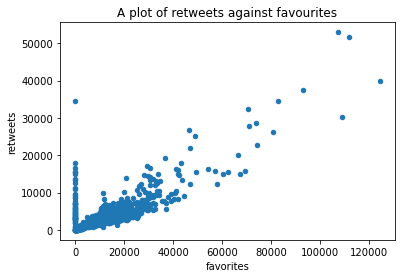

In [63]:
tweetsclean.plot(x='favorites',y='retweets',kind='scatter');
plt.title('A plot of retweets against favourites');

In [64]:
tweetsclean.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,Confidencelevel
count,1.946000e+03,1946.000000,1946.000000,1946.000000,1946.000000,1.946000e+03,1946.000000
mean,7.374673e+17,12.283032,10.491778,7359.317061,2330.395683,9.269652e+06,0.464514
std,6.726303e+16,41.942754,7.225290,10920.321983,3893.895758,1.921746e+02,0.338503
min,6.660209e+17,0.000000,7.000000,0.000000,11.000000,9.269527e+06,0.000000
25%,6.765921e+17,10.000000,10.000000,1464.750000,511.250000,9.269540e+06,0.142291
50%,7.113353e+17,11.000000,10.000000,3242.500000,1114.000000,9.269546e+06,0.459130
75%,7.910165e+17,12.000000,10.000000,9137.500000,2653.000000,9.269848e+06,0.772620
max,8.921774e+17,1776.000000,170.000000,124224.000000,52966.000000,9.270029e+06,0.999956


What was the dog rating distribution like?

### Visualization

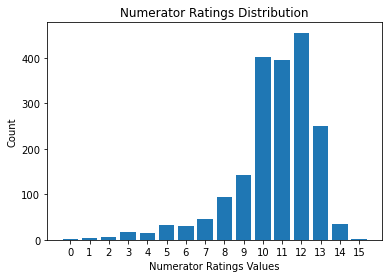

In [65]:
Ratings = tweetsclean[(tweetsclean['rating_numerator'] <= 15) & (tweetsclean.rating_numerator.apply(float.is_integer))]
counts = Ratings.groupby(['rating_numerator']).count()['tweet_id']
plt.bar(np.arange(16), counts)
plt.xticks(np.arange(16))
plt.xlabel('Numerator Ratings Values')
plt.ylabel('Count')
plt.title('Numerator Ratings Distribution');


### Insights:
1.Retweets are positively correlated with favorites

2.Most dogs were rated 12

3.Most Common Numerator rating range was between 10 and 13